# Aprendizagem - 2nd Assignment
For the 2nd assignment of Aprendizagem we were asked to predict the canopy height of a tree given a set of features. The datasets are available on [kaggle](https://www.kaggle.com/c/canopy-height/).

## Data presentation and analysis
The data available for each tree is collected by satelites. The dataset available has 154 attributes with the first one being the tree's _id_ and the last one being the tree's canopy height prediction (_rh98_). All the attributes are numerical, as well as the predicted canopy height. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

In [3]:
train_dataset = pd.read_csv('../datasets/train.csv')
X_final_test = pd.read_csv('../datasets/test.csv')

In [8]:
train_dataset['rh98'].head()

0     9.06
1     3.22
2     7.00
3    14.94
4    11.42
Name: rh98, dtype: float64

Since the _rh98_ feature is a continous value, and not a categorical one, we can claim that the canopy height prediction is a regression problem and not a classification.

In [12]:
train_dataset.shape

(29098, 154)

To ensure that there is no missing data we'll drop the rows that contain missing data.

In [23]:
train_dataset.dropna().shape

(29098, 154)

The dataset had no missing values, since the number of rows before and after applying the drop of _nan\_value_ is the same: 29098.

### Atribute's Information
The attributes are diveded into 5 subsets:
- Surface information.
- Sentinel-2 information.
- Sentinel-1 information.
- Palsar information.
- Calculated indexes.  

The **surface information** is composed by 3 attributes:

In [15]:
train_dataset.iloc[:, 1:4].describe()

,aspect,elevation,slope
count,29098.000000,29098.000000,29098.000000
mean,-0.012836,200.365627,6.758245
std,0.710396,112.360472,5.428400
min,-1.000000,4.000000,0.000000
25%,-0.782304,119.000000,2.780288
50%,0.000000,175.000000,5.039364
75%,0.723124,257.000000,9.290806
max,1.000000,780.000000,36.833881


The **sentinel-2 information** is compose by 50 attributes:

In [18]:
train_dataset.iloc[:, 4:54].describe()

,B2_ago,B2_jul,B2_jun,B2_may,B2_sep,B3_ago,B3_jul,B3_jun,B3_may,B3_sep,...,B11_ago,B11_jul,B11_jun,B11_may,B11_sep,B12_ago,B12_jul,B12_jun,B12_may,B12_sep
count,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,...,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000
mean,0.058219,0.063284,0.061435,0.052699,0.054484,0.084856,0.090407,0.087985,0.080613,0.080648,...,0.306935,0.318001,0.309783,0.272335,0.292869,0.204302,0.212223,0.208818,0.177303,0.195288
std,0.022375,0.022177,0.022332,0.019686,0.021926,0.028212,0.027918,0.026641,0.023781,0.027397,...,0.068267,0.068273,0.066092,0.058567,0.068785,0.060133,0.060930,0.060729,0.054462,0.060884
min,0.015050,0.017600,0.017450,0.015200,0.010800,0.026500,0.032100,0.031800,0.027100,0.019850,...,0.089000,0.100500,0.103750,0.080500,0.086200,0.042100,0.049900,0.049000,0.047900,0.040800
25%,0.042250,0.047400,0.046550,0.039200,0.038763,0.064700,0.070500,0.069750,0.064550,0.060900,...,0.258300,0.269500,0.262750,0.229400,0.243300,0.161463,0.169100,0.165600,0.137500,0.151000
50%,0.055000,0.060100,0.058100,0.048900,0.051000,0.080350,0.086300,0.083500,0.076000,0.076050,...,0.308300,0.320300,0.311800,0.269400,0.293000,0.202100,0.210500,0.206750,0.171850,0.192150
75%,0.070100,0.075000,0.071900,0.061600,0.066250,0.100200,0.105600,0.101250,0.091200,0.095400,...,0.354850,0.366000,0.356000,0.311000,0.340700,0.244300,0.252600,0.248087,0.210400,0.235700
max,0.266650,0.268400,0.308050,0.278550,0.259600,0.312100,0.314550,0.324850,0.330800,0.315900,...,0.587700,0.594700,0.596900,0.590800,0.572900,0.541000,0.539950,0.566650,0.546500,0.537600


The **sentinel-1 information** is composed by 40 attributes:

In [19]:
train_dataset.iloc[:, 54:94].describe()

,S1_VH_ago,S1_VH_ago_hom,S1_VH_ago_mean,S1_VH_ago_var,S1_VH_jul,S1_VH_jul_hom,S1_VH_jul_mean,S1_VH_jul_var,S1_VH_jun,S1_VH_jun_hom,...,S1_VV_jun_mean,S1_VV_jun_var,S1_VV_may,S1_VV_may_hom,S1_VV_may_mean,S1_VV_may_var,S1_VV_sep,S1_VV_sep_hom,S1_VV_sep_mean,S1_VV_sep_var
count,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,...,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000
mean,-17.867194,0.562510,0.438199,767.124757,-17.787096,0.577225,0.457662,835.831302,-17.746672,0.580525,...,0.314175,396.134935,-10.981706,0.583868,0.331452,439.883833,-11.321198,0.550443,0.324642,423.105528
std,2.124321,0.100670,0.029308,102.371419,2.087630,0.100029,0.027625,100.723663,2.017366,0.099270,...,0.027178,70.197396,1.686293,0.099948,0.025651,69.782099,1.849759,0.101497,0.028546,76.245264
min,-28.341902,0.114264,0.309679,359.190491,-29.013390,0.168944,0.331163,419.125793,-27.701832,0.144463,...,0.204210,164.621139,-18.593239,0.163870,0.229384,205.486115,-18.794500,0.157840,0.208116,168.141632
25%,-19.135162,0.494444,0.419922,701.349686,-19.033004,0.509967,0.440538,772.312241,-18.986259,0.513889,...,0.295790,347.632378,-12.075884,0.518301,0.314019,392.504295,-12.490664,0.483333,0.305556,371.196220
50%,-17.744566,0.563889,0.439236,766.693298,-17.639393,0.579412,0.458984,840.234009,-17.637031,0.580556,...,0.313585,392.425110,-10.994026,0.586111,0.331163,436.849548,-11.363362,0.552778,0.323785,418.547699
75%,-16.456154,0.630556,0.458767,835.479279,-16.392554,0.647222,0.476997,905.280212,-16.414435,0.647222,...,0.332031,437.783966,-9.983261,0.652778,0.347873,480.355598,-10.239817,0.619444,0.343316,469.494019
max,-4.722574,0.986111,0.588542,1410.058350,-5.233711,0.963889,0.596788,1425.157959,-4.307853,0.972222,...,0.476780,898.974548,2.485996,0.944444,0.482422,938.882080,1.422586,0.958333,0.479601,948.721741


The **palsar information** is composed by 8 attributes:

In [21]:
train_dataset.iloc[:, 94:102].describe()

,Palsar_HH,Palsar_HV,HH_hom,HH_mean,HH_var,HV_hom,HV_mean,HV_var
count,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000
mean,-11.083612,-17.791722,0.303352,0.485857,952.555394,0.331561,0.466255,878.412157
std,2.918067,3.558314,0.080243,0.044188,181.370155,0.083047,0.049971,185.326637
min,-24.943630,-33.782043,0.058603,0.277561,251.911484,0.069863,0.236328,208.842743
25%,-12.996643,-20.083645,0.247089,0.457682,833.711685,0.272871,0.435547,755.673431
50%,-11.065860,-17.498383,0.298630,0.487196,947.514557,0.326883,0.471571,888.104614
75%,-9.240730,-15.298604,0.354412,0.514540,1062.085907,0.384666,0.501519,1005.955765
max,7.722327,-5.641816,0.683443,0.819878,2756.162109,0.738889,0.623481,1558.989136


The **calculated indexes** are composed by 51 attributes:

In [22]:
train_dataset.iloc[:, 102:153].describe()

,DPSVI_jul,NDII_ago,NDII_jul,NDII_jun,NDII_may,NDII_sep,NDRE1_ago,NDRE1_jul,NDRE1_jun,NDRE1_may,...,NDWI_ago,NDWI_jul,NDWI_jun,NDWI_may,NDWI_sep,PSRI_ago,PSRI_jul,PSRI_jun,PSRI_may,PSRI_sep
count,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,...,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000
mean,3528.210536,0.410144,0.409629,0.432770,0.489982,0.410791,-0.165899,-0.162491,-0.175098,-0.218193,...,-0.483961,-0.482917,-0.499658,-0.527980,-0.483092,0.123394,0.123459,0.110181,0.062967,0.123459
std,695.073073,0.138884,0.133704,0.135625,0.136315,0.139809,0.083090,0.076513,0.081833,0.088013,...,0.094775,0.090114,0.089220,0.086544,0.096009,0.075911,0.075137,0.076391,0.069724,0.075049
min,443.420502,0.073487,0.075269,0.088935,0.077655,0.066667,-0.592982,-0.577462,-0.639492,-0.627717,...,-0.799051,-0.807060,-0.798343,-0.794246,-0.792771,-0.113063,-0.096803,-0.145982,-0.118608,-0.097460
25%,3074.329712,0.305275,0.309558,0.333014,0.394202,0.304560,-0.206610,-0.200611,-0.215281,-0.268551,...,-0.549135,-0.544885,-0.560014,-0.588149,-0.549860,0.072792,0.073290,0.057788,0.013658,0.072766
50%,3497.772095,0.396510,0.396609,0.420463,0.488307,0.398356,-0.147113,-0.145452,-0.157050,-0.206084,...,-0.481775,-0.480677,-0.498645,-0.533046,-0.480849,0.127052,0.127164,0.112578,0.060357,0.126701
75%,3956.155884,0.500000,0.495771,0.519969,0.583269,0.503352,-0.104704,-0.106134,-0.115493,-0.154120,...,-0.417628,-0.419831,-0.438565,-0.471949,-0.414111,0.178111,0.178028,0.165189,0.106852,0.177557
max,7185.793945,0.894247,0.893578,0.910826,0.896699,0.876796,0.007307,0.019547,0.002267,-0.001883,...,-0.075741,-0.137326,-0.128294,0.092509,-0.117401,0.370806,0.371316,0.365913,0.365601,0.384102


By looking at the attribute's description it's clear that the range of the attribute's values is very large, therefore, for some algotithms they might need to be normalized.

### Attribute's Plot
We'll try to vizualize the outliers for each attribute. For that, we'll be using a boxplot.

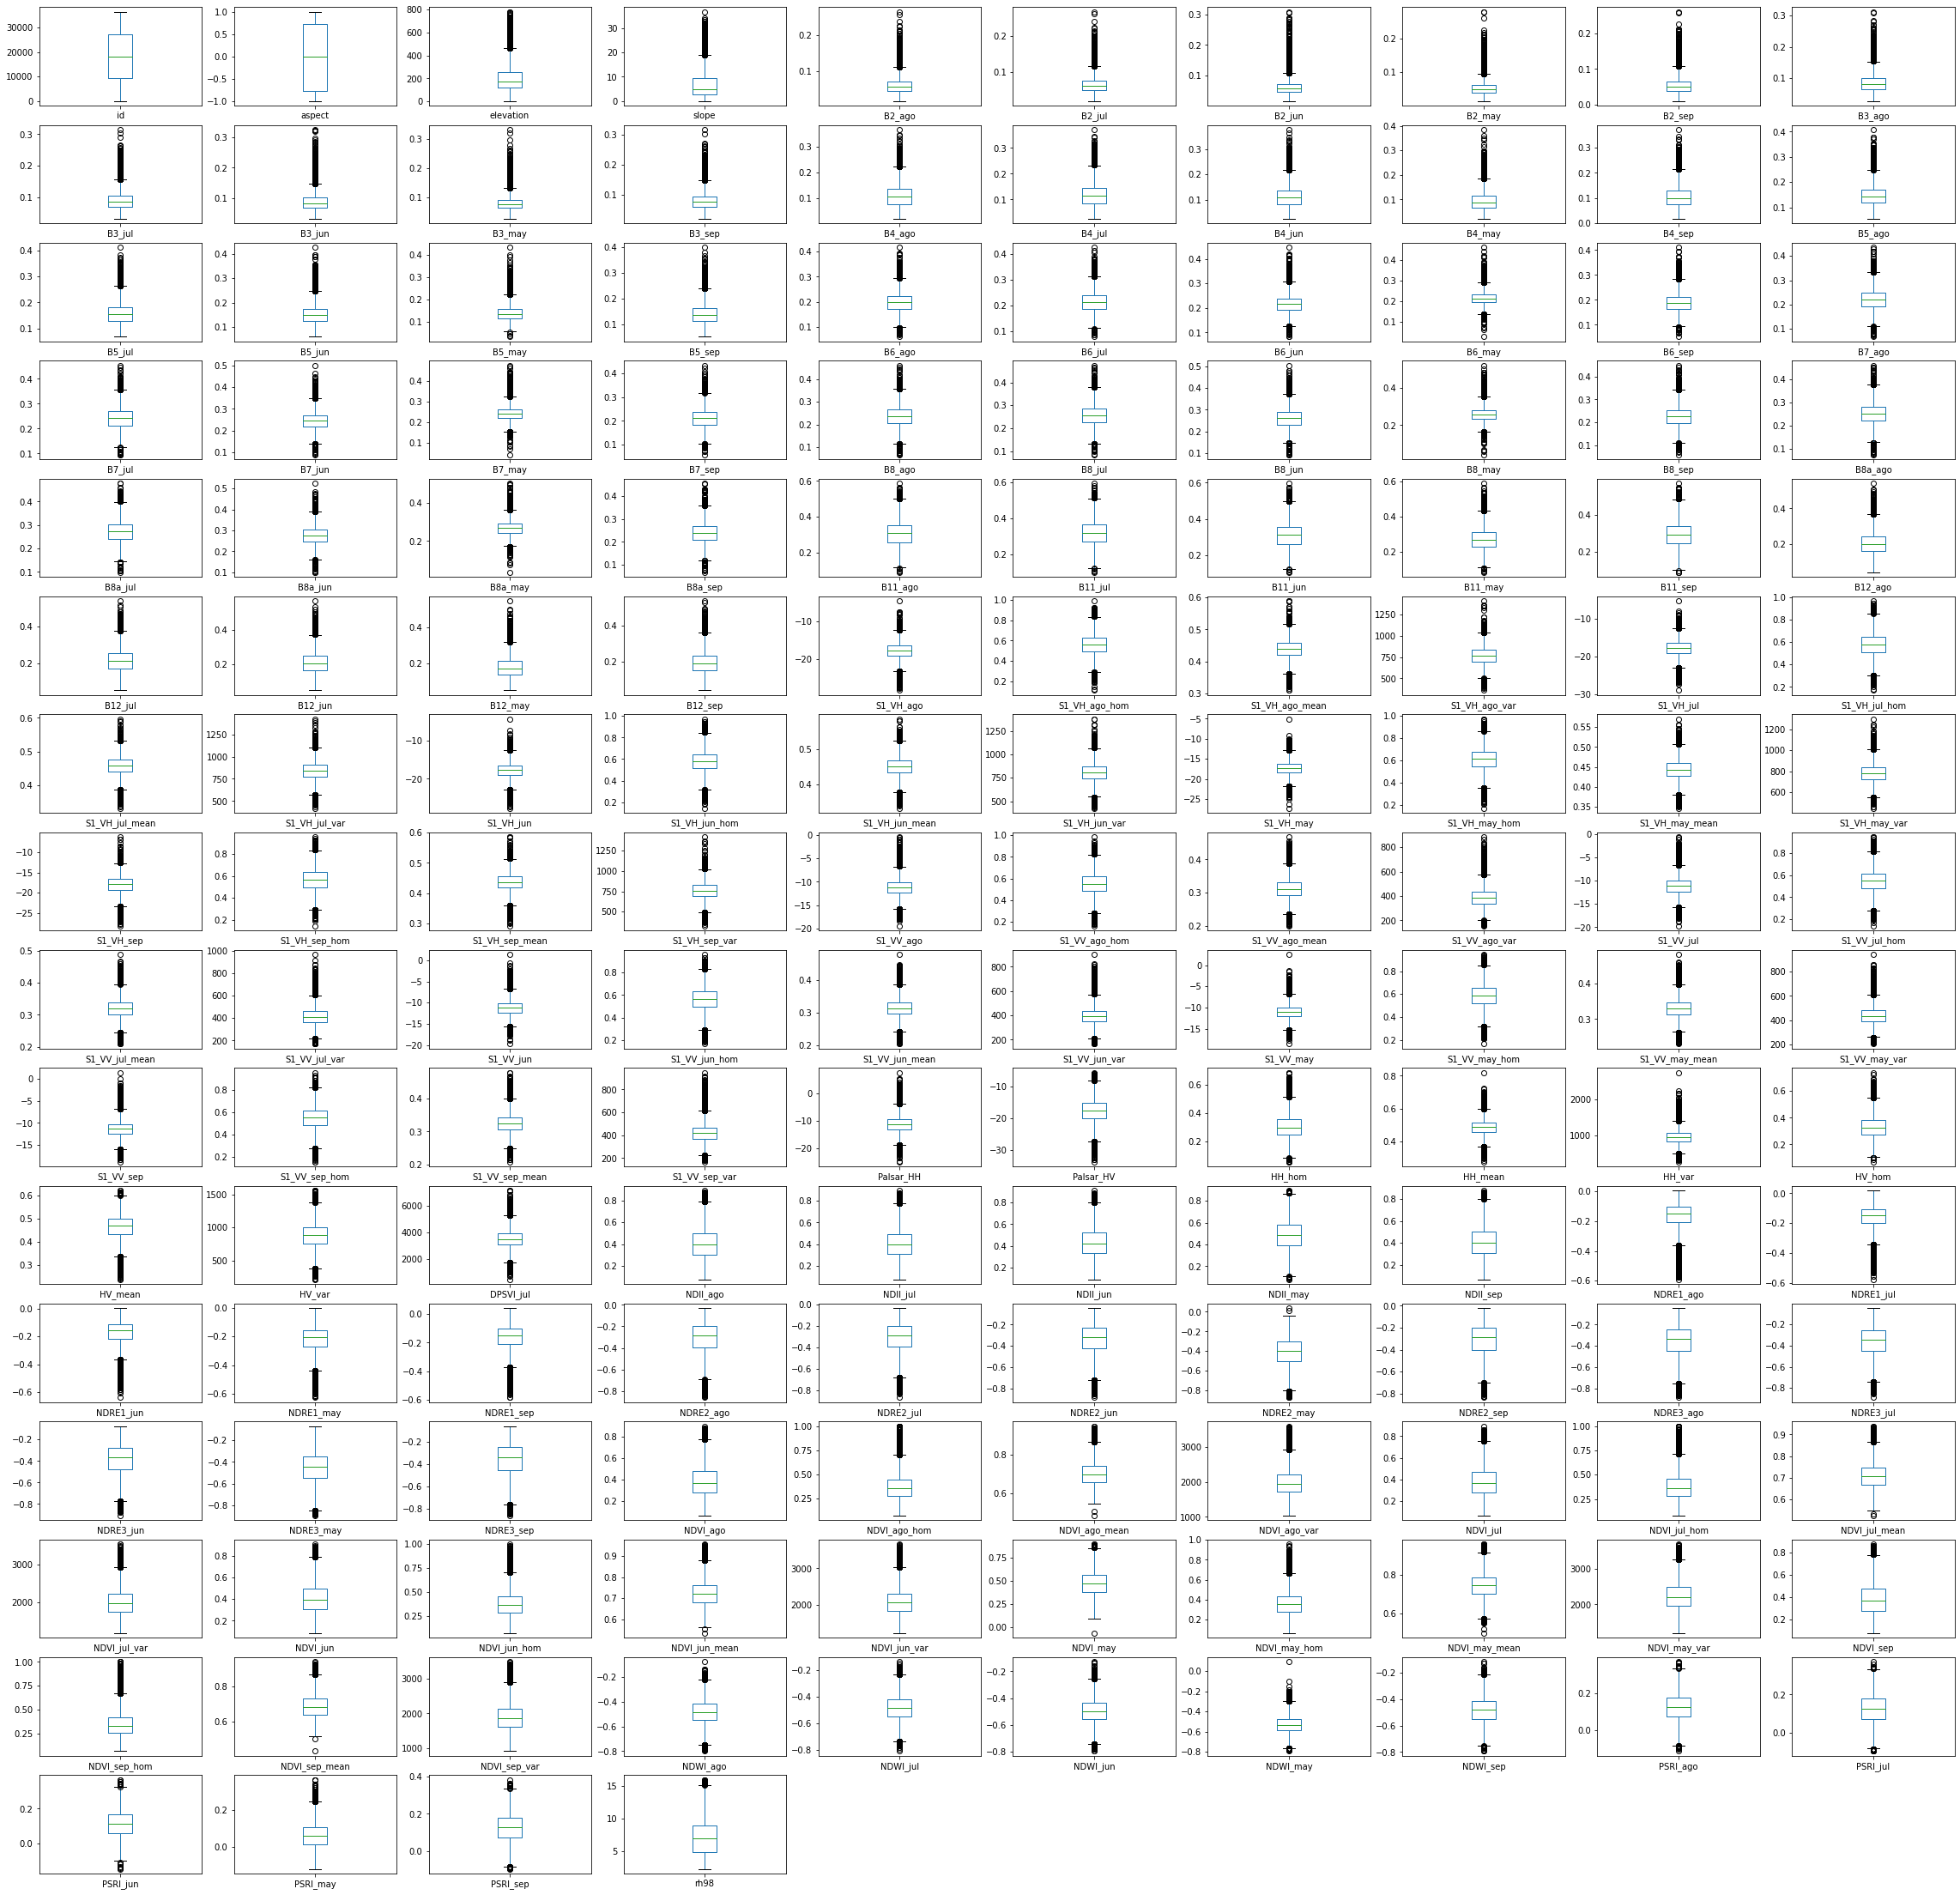

In [50]:
train_dataset.plot(kind='box', subplots=True, layout=(16,10), sharex=False, figsize=[40,40])
plt.show()

As it can be observed, there are a lot of outliers for most of the attributes. I had this impression when looking at the attribute's descriptions above.  
This might be a starting point (eliminate the outliers in order to get a better model).

For the step of vizualizing the data, one of the greatest difficult I've found was to found a suitable graph that would show me usefull information for each attribute.

## Experimenting Models
After analysing the data we'll try to create a good model to predict the canopy height. Since the score measure in kaggle is the _Root-meaned Square Error_ that is also the measure we'll be using.


In [4]:
y = train_dataset['rh98']
X = train_dataset.drop(columns='rh98')
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# function to export csv
def export_predict(model_name: str, prediction, test_dataset: pd.DataFrame) -> pd.DataFrame:
    rh98_series = pd.Series(prediction)
    submission = pd.concat([test_dataset['id'], rh98_series], axis=1)
    submission.set_axis(['id', 'rh98'], axis='columns')
    submission.to_csv(f'{model_name}_pred.csv', index=False)

### Lasso Regressor

Since this is a regression problem, the first model we'll try to create will be with Lasso regression. I'm choosing Lasso over Ridge due to the high number of attributes that the dataset contains and Lasso's incorporated _feature selection_. 

Due to its nature, it might be a good idea to normalize the data.

In [3]:
train_normalized = pd.DataFrame(normalize(train_dataset))
train_normalized[0] = train_dataset['id'].reset_index()

y_normalized = train_normalized.iloc[:,-1]
X_normalized = train_normalized.drop(columns=train_normalized.columns[-1])

X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_normalized, y_normalized)

In [15]:
lasso_clf = Lasso(alpha=5)
lasso_clf.fit(X_train_normalized, y_train_normalized)
y_predicted = lasso_clf.predict(X_test_normalized)
print(f'Root Mean Square Error score for Lasso Regression is {mean_squared_error(y_predicted, y_test_normalized, squared=False)}')

Root Mean Square Error score for Lasso Regression is 0.000335930978568912


In [21]:
lasso_prediction = lasso_clf.predict(X_final_test)
export_predict('lasso', lasso_prediction, X_final_test)

After submiting this prediction to _kaggle_ I got a _rmse_ score of 7, therefore I can say that this model clearly is not fit to predict the canopy height.  

I think the problem is: I should have not normalized the output of the model, and I should have normalized the test_dataset. Basically, leave the y's untouched and normalize the X's.  
Unfortunatelly I do not have time to test this hunch.

### Random Forest Regressor
Due to the large number of features I considered an ensemble strategy. The ensemble strategy choosen was the Random Forest Regressor.  
This algorithm usually behaves well in regression problems even without a lot of fine tunning.  

Still, I will perform a grid search in order to discover the best parameters for this algorithm

In [ ]:
params = {"n_estimators": [100, 500, 1000],
        "max_depth": [30, 50, 100],
        "max_features": ["auto", "sqrt"]}

clf = RandomForestRegressor(n_jobs=-1)
grid = GridSearchCV(estimator=clf, param_grid=params, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

The cell above was excuted in my previous notebook, it took me 3 hours, therefore, I will not run it on this one.  
Nonetheless, I have the results for the best paramters: **{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000}**.  

This model is the one that has got me the best score by now: 1.85274.

In [25]:
rf_clf = RandomForestRegressor(max_depth=100, max_features='auto', n_estimators=1000, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_predicted = rf_clf.predict(X_test)
print(f'Root Mean Square Error score for Random Forest Regression is {mean_squared_error(y_predicted, y_test, squared=False)}')

Root Mean Square Error score for Random Forest Regression is 1.8544346870763904


### K-Nearest Neighbors
Knn builds the model based on the distance between points, for that reason, it might be a good algorithm to preddict the canopy height

In [34]:
knn_clf = KNeighborsRegressor(n_neighbors=30, weights='distance', algorithm='kd_tree')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(f'Root Mean Square Error score for KNN is {mean_squared_error(y_pred, y_test, squared=False)}')

Root Mean Square Error score for Neural Net is 2.091737305807301


Since we're computing distances we should have the data in the same intervals, therefore it would be a good idea to use normalized data.  

However, and since I had problems with normalizations for Lasso, I ended up not doing any transformations to the data.

The _rmse_ score from this model is 2.09.

### Support Vector Machine
I don't think this algorithm will perform very well due to the high number of features, which will translate in a greate number of hyperplanes

In [6]:
svr_clf = SVR()
svr_clf.fit(X_train, y_train)
y_pred = svr_clf.predict(X_test)
print(f'Root Mean Square Error score for SVR is {mean_squared_error(y_pred, y_test, squared=False)}')

Root Mean Square Error score for SVR is 2.2275554753458624


Using a _rbf_ kernel the score was not very good, it was around the 2,2 which is even worse than _knn_.  
This did not surprise me however, since I did not have much expectations for this model.

An interesting addition would be to observe the attributes that had the most importance and re-fit the model using those. Unfortunatelly, the way the _rbf_ kernel transforms the data does not allow **feature selection**.

### Voting Regressor

In [53]:
rf = RandomForestRegressor(max_depth=100, max_features='auto', n_estimators=1000, n_jobs=-1)
gb = GradientBoostingRegressor(n_estimators=200, max_depth=5)

clf = VotingRegressor([('a1', rf), ('a2', gb)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Root Mean Square Error score Ensemble with Voting Regressor is {mean_squared_error(y_pred, y_test, squared=False)}')

Root Mean Square Error score Ensemble with Voting Regressor is 1.8941635062700042


In [46]:
prediction = clf.predict(X_final_test)
export_predict('voting', prediction, X_final_test)

Using the _test dataset_ the rmse score was 1.78, which was my best score! 

### Stacking Regressor
This technique uses multiple estimators and feed their result to the final estimator in order to make prediction. In theory this seems a fit algorithm.

In [6]:
estimators = [('random_forst', RandomForestRegressor(max_depth=100, max_features='auto', n_estimators=1000, n_jobs=-1)),
             ('knn', KNeighborsRegressor(n_neighbors=30, weights='distance', algorithm='kd_tree'))]

final_estimator = GradientBoostingRegressor(n_estimators=200, max_depth=5)

rg = StackingRegressor(estimators=estimators,
                      final_estimator=final_estimator)
rg.fit(X_train, y_train)
y_pred = rg.predict(X_test)
print(f'Root Mean Square Error score Ensemble with GBR is {mean_squared_error(y_pred, y_test, squared=False)}')

NameError: name 'clf' is not defined

In [11]:
prediction = rg.predict(X_final_test)
export_predict('stacking', prediction, X_final_test)

I tried to use the _Stacking_ technique but it did not improve the score from the previous model, I don't remember the score however, and since it takes a lot of time to fit the model I will not present any score for this model.

## Best Model

My best model was an _ensemble of ensembles_.  
It uses a _Voting Regressor_ (with the default parameters). The algorithms that provide the results for voting are the _Random Forest_ and the _Gradient Boosting_.  

For the _Random Forests_ I used the parameters I had gotten from a previous _grid search_.   
The parameters are:
- **max_depth** = 100,
- **max_features** = 'auto'
- **n_estimators** = 1000

The _Gradient Boosting_ parameters were not found by using any _grid search_ because it was too expensive! To find them I simply tried some parameters that made sense to me and the ones that got me better results were:
- **n_estimators** = 200
- **max_depth** = 5



## Conclusion
I found this assignment harder than I initially thought it would be. The main reason is, I think, how abstract the data was to me.   

I could not understand properly what each feature meant and how they related to on another. This made it even harder to plot graphs in order to vizualize the data and infer conclusions from there. For instance, in another project, I had worked with some data from _SNS_ and, since I understood what the features meant, I was able to manually do feature selection in order to improve my model and reduce the time it takes to train it.  
This type of operation was not possible with this dataset.

In the end, most of the experiments were made simply following hunches due to the data's nature and the algoithms caractheristics.  
Just like I thought, the ensemble methods performed way better than other models using only one regressor, but were also computationally more expensive.  
Another techinique that was very expensive was the fine tuning, using the grid searchs, on top of that I felt like a lot of grid searches did not add much value to my notebook. For that reason I did a lot more research, searching algorithm's characteristics, techinques, what to use for regression problems...  

From my expiriences the model that had a better score was the one using the **_Voting Regressors_**, followed by the **_Stacking Regressor_**, the **_Random Forest Regressor_**, and at last the **_Knn Regressor**_.

I was a bit disappointed with finishing below the _top 3_, nontheless I feel like this job was essential to deepen my knowledge on the algorithms previously studied in _Aprendizagem_'s class.